In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import (
    ComprehensiveFCParameters,
    EfficientFCParameters,
    MinimalFCParameters,
)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from math import isnan

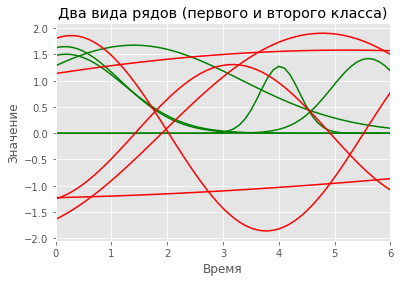

data.shape = (12200, 4)
data.id.nunique() = 200


,t,y,label,id
0,0.0,1.957849,1,0
1,0.1,1.957849,1,0
2,0.2,1.957849,1,0


In [4]:
N = 100  ## количество семплов каждого класса
Nvis = 5  ## сколько семплов будем визуализировать
timePoints = 61  ## количество элементов в каждом из рядов

df = pd.DataFrame()
data = pd.DataFrame()
t = np.linspace(0, 6, timePoints)

random.seed(42)

## генерируем семплы первого класса
for i in range(N):
    t0 = 2 * np.pi * random.random()
    a1 = 5 * random.random()
    A = 1 + random.random()

    df["t"] = t  ## ось времени
    df["y"] = A * np.exp(-((df.t - t0) ** 2) / 2 / a1)  ## значения временного ряда
    df["label"] = 1  ## класс временного ряда
    df["id"] = i  ## номер временного ряда

    data = data.append(df)  ## добавляем семпл в общий дейтафрейм
    if i < Nvis:  ## визуализируем первые Nvis-штук
        plt.plot(df.t, df.y, color="g")

## генерируем семплы второго класса
for i in range(N, 2 * N):
    A = 1 + random.random()  ## амплитуда
    w = 0 + random.random()  ## частота
    ph = 2 * np.pi * random.random()  ## фаза

    df["t"] = t  ## ось времени
    df["y"] = A * np.sin(t * w + ph)  ## значения временного ряда
    df["label"] = 0  ## класс временного ряда
    df["id"] = i  ## номер временного ряда

    data = data.append(df)  ## добавляем семпл в общий дейтафрейм
    if i < Nvis + N:  ## визуализируем первые Nvis-штук
        plt.plot(df.t, df.y, color="r")

## cдвигаем все значения вверх, чтобы все значения были положительными
data["y"] = data.y + np.abs(data.y.min())

plt.style.use("ggplot")
plt.xlabel("Время")
plt.ylabel("Значение")
plt.title("Два вида рядов (первого и второго класса)")
plt.xlim([t[0], t[-1]])
plt.show()

print("data.shape =", data.shape)
print("data.id.nunique() =", data.id.nunique())
data.head(3)

Посчитайте максимальное, минимальное, среднее и медианное значение для каждого временного ряда. Хинт: используйте функцию pandas.DataFrame.groupby(). Укажите эти значения округлённые до второго знака после запятой для временного ряда с id = 3.

In [11]:
data.groupby("id")["y"].describe().loc[3].round(2)

count    61.00
mean      2.34
std       0.54
min       1.96
25%       1.96
50%       2.00
75%       2.64
max       3.46
Name: 3, dtype: float64

Создайте дейтафрейм features с посчитанными фичами (минимальное, среднее и медианное значение) для каждого из рядов, содержащий, помимо фич, колонки:

'id', 'label'.

In [ ]:
# def select_features_tsfresh(data):
#     extraction_settings = {
#         # признак: параметр
#         "maximum": None,
#         "minimum": None,
#         "mean": None,
#         "median": None,
#     }

#     # извлечение фич из данных
#     features_df = extract_features(
#         data,
#         column_id="id",  # номер временного ряда
#         column_sort="t",  # ось времени
#         default_fc_parameters=extraction_settings,  # список фич, которые хотим извлечь
#         impute_function=impute,  # заменить все inf и NaN
#     )

#     # вытаскиваем колонку id из индекса
#     features_df = features_df.reset_index()

#     return features_df

In [42]:
extraction_settings = {
    # признак: параметр
    "maximum": None,
    "minimum": None,
    "mean": None,
    "median": None,
    "count_below_mean": None,
}

# извлечение фич из данных
features_df = extract_features(
    data.drop(["label"], axis=1),
    column_id="id",  # номер временного ряда
    column_sort="t",  # ось времени
    default_fc_parameters=extraction_settings,  # список фич, которые хотим извлечь
    impute_function=impute,  # заменить все inf и NaN
)
features_df = features_df.reset_index()
features_df.rename({"index":"id"}, axis=1, inplace=True)
features_df["label"] = 1
features_df.loc[N:, "label"] = 0
# features_df.drop(["")
display(features_df.head(3))
display(features_df.tail(3))
display(features_df.iloc[4].y__count_below_mean.round())


Feature Extraction: 100%|██████████| 20/20 [00:03<00:00,  6.18it/s]


,id,y__maximum,y__minimum,y__mean,y__median,y__count_below_mean,label
0,0,3.231294,1.957849,2.143130,1.957977,47.0,1
1,1,3.634548,2.052910,2.972939,3.143508,27.0,1
2,2,3.379718,1.957849,2.246776,1.958426,45.0,1


,id,y__maximum,y__minimum,y__mean,y__median,y__count_below_mean,label
197,197,1.960760,0.828983,1.305666,1.257858,33.0,0
198,198,3.298036,0.618728,2.110081,2.270264,28.0,0
199,199,1.623059,1.548715,1.585773,1.585714,31.0,0


42.0

trainSet.shape = (120, 6)
testSet.shape  = (80, 6)

Value counts train:
 1    60
0    60
Name: label, dtype: int64

Value counts test:
 1    40
0    40
Name: label, dtype: int64


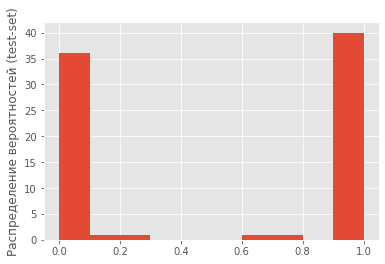

     features  importances
1  y__minimum     0.979876
0  y__maximum     0.019648
2     y__mean     0.000476
3   y__median     0.000000

   Pos  Neg
0   38    2
1    0   40

AUC = 1.000  Точность = 0.975



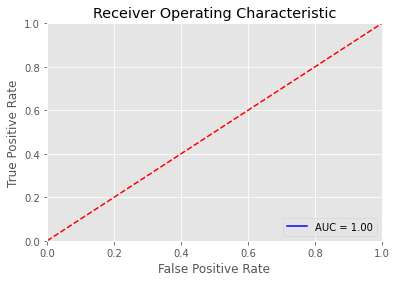

In [40]:
features = features_df.copy()
trainSet, testSet = train_test_split(features, test_size=0.4, random_state=42)

## выводим статистику по нашим наборам
print("trainSet.shape =", trainSet.shape)
print("testSet.shape  =", testSet.shape)
print()
print("Value counts train:\n", trainSet.label.value_counts())
print()
print("Value counts test:\n", testSet.label.value_counts())

## лист фич
featureList = trainSet.drop(["id", "label"], axis=1).columns

## параметры классификатора
params = {
    "n_estimators": 100,
    "max_depth": 4,
    "min_samples_split": 2,
    "max_features": 1.0,
    "class_weight": "balanced",
    "random_state": 42,
}

## обучаем классификатор
clf = RandomForestClassifier(**params).fit(trainSet[featureList], trainSet["label"])

## делаем предсказание на тестовом наборе
y_pred = clf.predict(testSet[featureList])
y_pred_proba = clf.predict_proba(testSet[featureList])[:, 1]  ## вероятности

## визуализируем вероятности для предсказаний
plt.hist(y_pred_proba)
plt.ylabel("Распределение вероятностей (test-set)")
plt.show()
## создадим для удобства дейтафрейм с результатами
res = testSet
res["pred"] = y_pred
res["pred_proba"] = y_pred_proba

## получаем из классификатора важность фич и отображаем их
ftmprt = pd.DataFrame()
ftmprt["features"] = featureList
ftmprt["importances"] = clf.feature_importances_
ftmprt = ftmprt.sort_values("importances", ascending=False)
print(ftmprt.head(20))
print()
proba = res.pred_proba

## считаем матрицу ошибок
CM = confusion_matrix(res["label"], res["pred"])
CM_DF = pd.DataFrame(data=CM, columns=["Pos", "Neg"])
print(CM_DF)

# ROC-AUC
FPR, TPR, thresholds = roc_curve(res["label"], res["pred_proba"])
roc_auc = auc(FPR, TPR)
acc = res[res["pred"] == res["label"]].shape[0] / res.shape[0]  ## точность
print(f"\nAUC = {roc_auc:.3f}  Точность = {acc:.3f}\n")

# ROC-кривая
plt.title("Receiver Operating Characteristic")
plt.plot(FPR, TPR, "b", label=f"AUC = {roc_auc:.2f}")
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()